In [310]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns

# makes sure charts appear in the notebook rather than a popup window
%matplotlib inline

In [311]:
#Import csv file

ud = pd.read_csv("3.1-data-sheet-udemy-courses-business-courses.csv")
ud

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
0,49798.0,Bitcoin or How I Learned to Stop Worrying and ...,https://www.udemy.com/bitcoin-or-how-i-learned...,0.0,65576.0,936.0,24.0,All Levels,0.560000,8.0,2013-04-20T02:25:22Z,Business Finance
1,48841.0,Accounting in 60 Minutes - A Brief Introduction,https://www.udemy.com/accounting-in-60-minutes...,0.0,56659.0,4397.0,16.0,Beginner Level,0.950000,1.5,2013-04-07T21:39:25Z,Business Finance
2,133536.0,Stock Market Investing for Beginners,https://www.udemy.com/the-beginners-guide-to-t...,0.0,50855.0,2698.0,15.0,All Levels,0.910000,1.5,2013-12-25T19:53:34Z,Business Finance
3,151668.0,Introduction to Financial Modeling,https://www.udemy.com/financial-modeling-asimp...,0.0,29167.0,1463.0,8.0,All Levels,0.180000,1.5,2014-05-27T16:22:16Z,Business Finance
4,648826.0,The Complete Financial Analyst Course 2017,https://www.udemy.com/the-complete-financial-a...,195.0,24481.0,2347.0,174.0,All Levels,0.370000,10.0,2016-01-21T01:38:48Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
1187,1231958.0,60 Minutes to Fundamental Accounting Skills,https://www.udemy.com/60-minute-fundamental-ac...,75.0,0.0,0.0,9.0,All Levels,0.950000,2.5,2017-06-28T21:55:29Z,Business Finance
1188,1057040.0,Teeter-Totter Accounting,https://www.udemy.com/teeter-totter-accounting/,90.0,0.0,0.0,12.0,Intermediate Level,0.360000,1.0,2017-02-08T22:15:56Z,Business Finance
1189,1258666.0,Financial Statement Auditing Cycles,https://www.udemy.com/financial-statement-audi...,50.0,0.0,0.0,9.0,All Levels,0.150000,2.0,2017-06-29T23:20:10Z,Business Finance
1190,1232282.0,The Cash Flow Statement - An Introduction,https://www.udemy.com/cash-flow-statement-intr...,50.0,0.0,0.0,10.0,All Levels,0.180000,1.5,2017-06-28T16:05:51Z,Business Finance


In [254]:
#Check the data types

ud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1192 entries, 0 to 1191
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            1191 non-null   float64
 1   course_title         1191 non-null   object 
 2   url                  1191 non-null   object 
 3   price                1191 non-null   float64
 4   num_subscribers      1191 non-null   float64
 5   num_reviews          1191 non-null   float64
 6   num_lectures         1191 non-null   float64
 7   level                1191 non-null   object 
 8   Rating               1192 non-null   float64
 9   content_duration     1191 non-null   float64
 10  published_timestamp  1191 non-null   object 
 11  subject              1191 non-null   object 
dtypes: float64(7), object(5)
memory usage: 111.9+ KB


In [255]:
#Check the number of null values

ud.isna().sum()

course_id              1
course_title           1
url                    1
price                  1
num_subscribers        1
num_reviews            1
num_lectures           1
level                  1
Rating                 0
content_duration       1
published_timestamp    1
subject                1
dtype: int64

In [256]:
#Check the maximum rate in order to understand what is the unit of the Rating column

ud["Rating"].max()

#We will multiply the rating by 10 in order to have a rate / 10 instead of a float

1.0

In [312]:
#Check if there are duplicates

ud["course_id"].nunique()

#There are 1191 unique values, and we know that there is one null value in the course_id column, so all the other course_id are uniques.

1191

In [313]:
#Remove the null values

ud = ud.dropna(subset=['course_id'])

#ud["course_id"] = ud["course_id"].drop(1191)
#ud["course_id"]

In [259]:
ud

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
0,49798.0,Bitcoin or How I Learned to Stop Worrying and ...,https://www.udemy.com/bitcoin-or-how-i-learned...,0.0,65576.0,936.0,24.0,All Levels,0.56,8.0,2013-04-20T02:25:22Z,Business Finance
1,48841.0,Accounting in 60 Minutes - A Brief Introduction,https://www.udemy.com/accounting-in-60-minutes...,0.0,56659.0,4397.0,16.0,Beginner Level,0.95,1.5,2013-04-07T21:39:25Z,Business Finance
2,133536.0,Stock Market Investing for Beginners,https://www.udemy.com/the-beginners-guide-to-t...,0.0,50855.0,2698.0,15.0,All Levels,0.91,1.5,2013-12-25T19:53:34Z,Business Finance
3,151668.0,Introduction to Financial Modeling,https://www.udemy.com/financial-modeling-asimp...,0.0,29167.0,1463.0,8.0,All Levels,0.18,1.5,2014-05-27T16:22:16Z,Business Finance
4,648826.0,The Complete Financial Analyst Course 2017,https://www.udemy.com/the-complete-financial-a...,195.0,24481.0,2347.0,174.0,All Levels,0.37,10.0,2016-01-21T01:38:48Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
1186,885413.0,Foundations of Investing,https://www.udemy.com/foundations-of-investing/,40.0,0.0,0.0,18.0,Beginner Level,0.95,2.0,2016-07-27T21:07:46Z,Business Finance
1187,1231958.0,60 Minutes to Fundamental Accounting Skills,https://www.udemy.com/60-minute-fundamental-ac...,75.0,0.0,0.0,9.0,All Levels,0.95,2.5,2017-06-28T21:55:29Z,Business Finance
1188,1057040.0,Teeter-Totter Accounting,https://www.udemy.com/teeter-totter-accounting/,90.0,0.0,0.0,12.0,Intermediate Level,0.36,1.0,2017-02-08T22:15:56Z,Business Finance
1189,1258666.0,Financial Statement Auditing Cycles,https://www.udemy.com/financial-statement-audi...,50.0,0.0,0.0,9.0,All Levels,0.15,2.0,2017-06-29T23:20:10Z,Business Finance


In [314]:
#Convert data types

ud["course_id"] = ud["course_id"].astype(int)
ud["num_subscribers"] = ud["num_subscribers"].astype(int)
ud["num_reviews"] = ud["num_reviews"].astype(int)
ud["num_lectures"] = ud["num_lectures"].astype(int)


/var/folders/xp/jp6pr1sn3p50vy46h4q0ntqr0000gn/T/ipykernel_86457/2715242729.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ud["course_id"] = ud["course_id"].astype(int)
/var/folders/xp/jp6pr1sn3p50vy46h4q0ntqr0000gn/T/ipykernel_86457/2715242729.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ud["num_subscribers"] = ud["num_subscribers"].astype(int)
/var/folders/xp/jp6pr1sn3p50vy46h4q0ntqr0000gn/T/ipykernel_86457/2715242729.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [315]:
ud["Rating"] = ud["Rating"] * 10

/var/folders/xp/jp6pr1sn3p50vy46h4q0ntqr0000gn/T/ipykernel_86457/2107831108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ud["Rating"] = ud["Rating"] * 10


In [316]:
ud.loc[(ud["course_id"] == 52118), "course_title"].str.split(',')

147    [Multiply your returns using 'Value Investing"...
Name: course_title, dtype: object

In [263]:
ud

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
0,49798,Bitcoin or How I Learned to Stop Worrying and ...,https://www.udemy.com/bitcoin-or-how-i-learned...,0.0,65576,936,24,All Levels,5.6,8.0,2013-04-20T02:25:22Z,Business Finance
1,48841,Accounting in 60 Minutes - A Brief Introduction,https://www.udemy.com/accounting-in-60-minutes...,0.0,56659,4397,16,Beginner Level,9.5,1.5,2013-04-07T21:39:25Z,Business Finance
2,133536,Stock Market Investing for Beginners,https://www.udemy.com/the-beginners-guide-to-t...,0.0,50855,2698,15,All Levels,9.1,1.5,2013-12-25T19:53:34Z,Business Finance
3,151668,Introduction to Financial Modeling,https://www.udemy.com/financial-modeling-asimp...,0.0,29167,1463,8,All Levels,1.8,1.5,2014-05-27T16:22:16Z,Business Finance
4,648826,The Complete Financial Analyst Course 2017,https://www.udemy.com/the-complete-financial-a...,195.0,24481,2347,174,All Levels,3.7,10.0,2016-01-21T01:38:48Z,Business Finance
...,...,...,...,...,...,...,...,...,...,...,...,...
1186,885413,Foundations of Investing,https://www.udemy.com/foundations-of-investing/,40.0,0,0,18,Beginner Level,9.5,2.0,2016-07-27T21:07:46Z,Business Finance
1187,1231958,60 Minutes to Fundamental Accounting Skills,https://www.udemy.com/60-minute-fundamental-ac...,75.0,0,0,9,All Levels,9.5,2.5,2017-06-28T21:55:29Z,Business Finance
1188,1057040,Teeter-Totter Accounting,https://www.udemy.com/teeter-totter-accounting/,90.0,0,0,12,Intermediate Level,3.6,1.0,2017-02-08T22:15:56Z,Business Finance
1189,1258666,Financial Statement Auditing Cycles,https://www.udemy.com/financial-statement-audi...,50.0,0,0,9,All Levels,1.5,2.0,2017-06-29T23:20:10Z,Business Finance


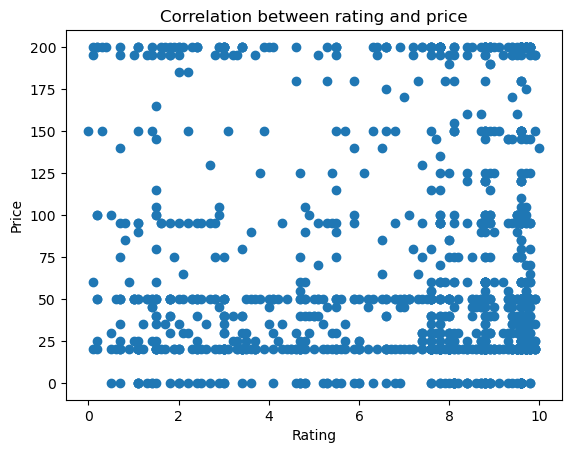

In [264]:
plt.scatter(ud["Rating"], ud["price"])
plt.title("Correlation between rating and price")
plt.xlabel("Rating")
plt.ylabel("Price")
plt.show()


In [265]:
pearson_correlation = ud[["Rating", "price"]]
pearson_correlation.corr(method='pearson')


,Rating,price
Rating,1.00000,-0.02523
price,-0.02523,1.00000


In [266]:
spearman_correlation = ud[["Rating", "price"]]
spearman_correlation.corr(method='spearman')


,Rating,price
Rating,1.000000,-0.003892
price,-0.003892,1.000000


In [267]:
#It looks like there is no correlation between the rating and the price, so in other words, lessons that have a higher price do not have a better rate.

In [317]:
ud.loc[(ud["price"] == 0), "Free"] = 1


/var/folders/xp/jp6pr1sn3p50vy46h4q0ntqr0000gn/T/ipykernel_86457/3364736061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ud.loc[(ud["price"] == 0), "Free"] = 1


In [318]:
ud.loc[(ud["price"] > 0), "Paid"] = 1
ud

/var/folders/xp/jp6pr1sn3p50vy46h4q0ntqr0000gn/T/ipykernel_86457/3673660217.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ud.loc[(ud["price"] > 0), "Paid"] = 1


,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject,Free,Paid
0,49798,Bitcoin or How I Learned to Stop Worrying and ...,https://www.udemy.com/bitcoin-or-how-i-learned...,0.0,65576,936,24,All Levels,5.6,8.0,2013-04-20T02:25:22Z,Business Finance,1.0,NaN
1,48841,Accounting in 60 Minutes - A Brief Introduction,https://www.udemy.com/accounting-in-60-minutes...,0.0,56659,4397,16,Beginner Level,9.5,1.5,2013-04-07T21:39:25Z,Business Finance,1.0,NaN
2,133536,Stock Market Investing for Beginners,https://www.udemy.com/the-beginners-guide-to-t...,0.0,50855,2698,15,All Levels,9.1,1.5,2013-12-25T19:53:34Z,Business Finance,1.0,NaN
3,151668,Introduction to Financial Modeling,https://www.udemy.com/financial-modeling-asimp...,0.0,29167,1463,8,All Levels,1.8,1.5,2014-05-27T16:22:16Z,Business Finance,1.0,NaN
4,648826,The Complete Financial Analyst Course 2017,https://www.udemy.com/the-complete-financial-a...,195.0,24481,2347,174,All Levels,3.7,10.0,2016-01-21T01:38:48Z,Business Finance,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186,885413,Foundations of Investing,https://www.udemy.com/foundations-of-investing/,40.0,0,0,18,Beginner Level,9.5,2.0,2016-07-27T21:07:46Z,Business Finance,NaN,1.0
1187,1231958,60 Minutes to Fundamental Accounting Skills,https://www.udemy.com/60-minute-fundamental-ac...,75.0,0,0,9,All Levels,9.5,2.5,2017-06-28T21:55:29Z,Business Finance,NaN,1.0
1188,1057040,Teeter-Totter Accounting,https://www.udemy.com/teeter-totter-accounting/,90.0,0,0,12,Intermediate Level,3.6,1.0,2017-02-08T22:15:56Z,Business Finance,NaN,1.0
1189,1258666,Financial Statement Auditing Cycles,https://www.udemy.com/financial-statement-audi...,50.0,0,0,9,All Levels,1.5,2.0,2017-06-29T23:20:10Z,Business Finance,NaN,1.0


In [270]:
new_df = ud.groupby(by=["level"])[["Free","Paid"]].sum().sort_values(by='level', ascending=False)[:-1]
new_df

,Free,Paid
level,,
Intermediate Level,14.0,120.0
Expert Level,4.0,21.0
Beginner Level,26.0,373.0


In [271]:
new_df = new_df.sort_values(by='Paid', ascending=False)

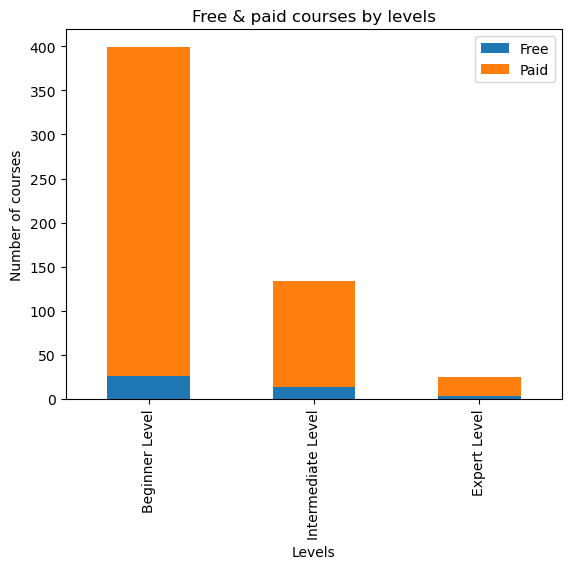

In [309]:
new_df.plot(kind='bar', stacked=True,
        title='Free & paid courses by levels')
plt.xlabel("Levels")
plt.ylabel("Number of courses")
plt.show()

In [319]:
import datetime

ud['year'] = pd.DatetimeIndex(ud['published_timestamp']).year
ud

/var/folders/xp/jp6pr1sn3p50vy46h4q0ntqr0000gn/T/ipykernel_86457/1295997345.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ud['year'] = pd.DatetimeIndex(ud['published_timestamp']).year


,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject,Free,Paid,year
0,49798,Bitcoin or How I Learned to Stop Worrying and ...,https://www.udemy.com/bitcoin-or-how-i-learned...,0.0,65576,936,24,All Levels,5.6,8.0,2013-04-20T02:25:22Z,Business Finance,1.0,NaN,2013
1,48841,Accounting in 60 Minutes - A Brief Introduction,https://www.udemy.com/accounting-in-60-minutes...,0.0,56659,4397,16,Beginner Level,9.5,1.5,2013-04-07T21:39:25Z,Business Finance,1.0,NaN,2013
2,133536,Stock Market Investing for Beginners,https://www.udemy.com/the-beginners-guide-to-t...,0.0,50855,2698,15,All Levels,9.1,1.5,2013-12-25T19:53:34Z,Business Finance,1.0,NaN,2013
3,151668,Introduction to Financial Modeling,https://www.udemy.com/financial-modeling-asimp...,0.0,29167,1463,8,All Levels,1.8,1.5,2014-05-27T16:22:16Z,Business Finance,1.0,NaN,2014
4,648826,The Complete Financial Analyst Course 2017,https://www.udemy.com/the-complete-financial-a...,195.0,24481,2347,174,All Levels,3.7,10.0,2016-01-21T01:38:48Z,Business Finance,NaN,1.0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1186,885413,Foundations of Investing,https://www.udemy.com/foundations-of-investing/,40.0,0,0,18,Beginner Level,9.5,2.0,2016-07-27T21:07:46Z,Business Finance,NaN,1.0,2016
1187,1231958,60 Minutes to Fundamental Accounting Skills,https://www.udemy.com/60-minute-fundamental-ac...,75.0,0,0,9,All Levels,9.5,2.5,2017-06-28T21:55:29Z,Business Finance,NaN,1.0,2017
1188,1057040,Teeter-Totter Accounting,https://www.udemy.com/teeter-totter-accounting/,90.0,0,0,12,Intermediate Level,3.6,1.0,2017-02-08T22:15:56Z,Business Finance,NaN,1.0,2017
1189,1258666,Financial Statement Auditing Cycles,https://www.udemy.com/financial-statement-audi...,50.0,0,0,9,All Levels,1.5,2.0,2017-06-29T23:20:10Z,Business Finance,NaN,1.0,2017


In [445]:
barlinechart = ud.groupby(by=["year"])[["course_id"]].count().sort_values(by='year', ascending=True)

barlinechart["average_price"] = ud.groupby(by=["year"])[["price"]].mean().sort_values(by='year', ascending=True)

barlinechart

,course_id,average_price
year,,
2012,6,42.500000
2013,84,45.535714
2014,192,53.151042
2015,339,68.141593
2016,347,73.213256
2017,223,85.313901


In [446]:
barlinechart["year"] = barlinechart.index
barlinechart

,course_id,average_price,year
year,,,
2012,6,42.500000,2012
2013,84,45.535714,2013
2014,192,53.151042,2014
2015,339,68.141593,2015
2016,347,73.213256,2016
2017,223,85.313901,2017


In [447]:
barlinechart.reset_index(drop=True, inplace = True)
barlinechart

,course_id,average_price,year
0,6,42.500000,2012
1,84,45.535714,2013
2,192,53.151042,2014
3,339,68.141593,2015
4,347,73.213256,2016
5,223,85.313901,2017


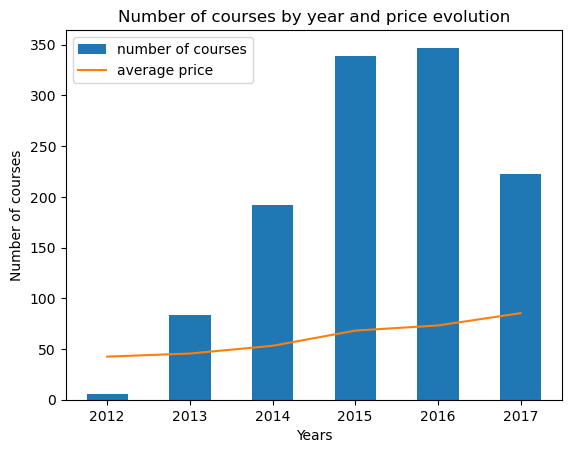

In [465]:
fig, ax = plt.subplots(1, facecolor='white')
barlinechart.plot(x = 'year', y = 'course_id', kind='bar',
        title='Number of courses by year and price evolution', label='number of courses', ax=ax)
barlinechart.plot(y = 'average_price', kind='line', color='tab:orange', label='average price', ax=ax)
plt.xlabel("Years")
plt.ylabel("Number of courses")
plt.show()
